This study aims to analyze a dataset from Kaggle on credit applications. Our analysis aims to identify the most influential demographic and financial factors in the decision to grant or refuse a credit. First, we will explore the socio-demographic variables of the applicants. Then, we will look at the intrinsic characteristics of the requested credits.

In [6]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [7]:
data = pd.read_csv('Loan.csv')
data.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [65]:
print(data.ApplicationDate)

0        2018-01-01
1        2018-01-02
2        2018-01-03
3        2018-01-04
4        2018-01-05
            ...    
19995    2072-09-29
19996    2072-09-30
19997    2072-10-01
19998    2072-10-02
19999    2072-10-03
Name: ApplicationDate, Length: 20000, dtype: object


In [4]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [8]:
# Check for duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

# Demographics and Loan Approval 

### Age

In [6]:
bins = [0, 25, 35, 50, 65, float('inf')]
labels = ['Youth', 'Young adults', 'Middle-aged adults','Older adults', 'Seniors']
data['AgeGroup']=pd.cut(data['Age'], bins = bins, labels=labels)
data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,Middle-aged adults
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,Middle-aged adults
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,Middle-aged adults
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,Older adults
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,Middle-aged adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,Middle-aged adults
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,Older adults
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,Middle-aged adults
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,Older adults


In [ ]:
# we save the new dataset with the changes (age groups) to use for our Tableau dashboard
data.to_csv('LoanData.csv', index=False)

In [152]:
AgevsLoan = data[['Age', 'LoanApproved', 'AgeGroup' ]]
AgevsLoan = AgevsLoan.groupby('AgeGroup')['LoanApproved'].value_counts().unstack()
AgevsLoan['TotalApplications'] = AgevsLoan[0] + AgevsLoan[1]
AgevsLoan['ApprovalPercentage'] = AgevsLoan[1] / (AgevsLoan[0] + AgevsLoan[1]) * 100
AgevsLoan

LoanApproved,0,1,TotalApplications,ApprovalPercentage
AgeGroup,,,,
Youth,2105,277,2382,11.628883
Young adults,3994,968,4962,19.508263
Middle-aged adults,6613,2415,9028,26.750111
Older adults,2303,1022,3325,30.736842
Seniors,205,98,303,32.343234


Our analysis indicates that seniors submitted the fewest loan applications (303) but had the highest approval rate (32.34%). Middle-aged adults demonstrated the highest application volume (9028) with a 26.75% approval rate. Youth exhibited the lowest approval rate at 11.63%.

<Figure size 1000x600 with 0 Axes>

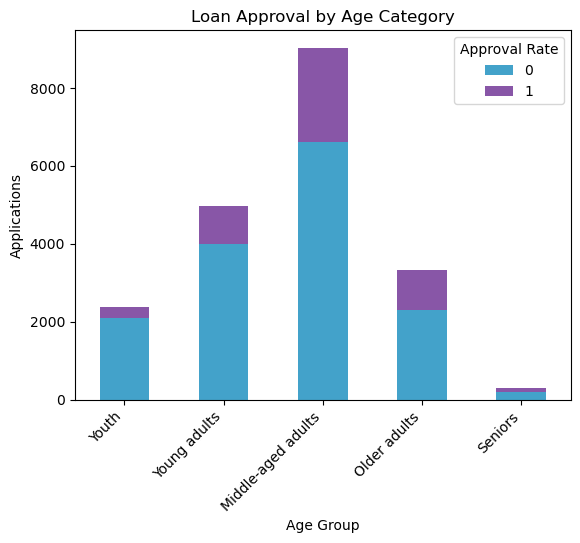

In [162]:
plt.figure(figsize=(10, 6))  
AgevsLoan[[0, 1]].plot(kind='bar', stacked=True, color=['#43a2ca', '#8856a7']) 
plt.xlabel('Age Group')
plt.ylabel('Applications')
plt.title('Loan Approval by Age Category')
plt.legend(title='Approval Rate')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Are these results statistically significant? 

We perfom statistical tests to check if the results above are statistically significant, or due to sampling errors. 

P-value treshold: 5% 

H0: 'The age of the applicant has no impact on loan applroval' 

H1: 'The age of the applicant significantly impacts loan applroval'

In [153]:
AgeTable = pd.crosstab(data['AgeGroup'], data['LoanApproved'])
AgeTable

LoanApproved,0,1
AgeGroup,,
Youth,2105,277
Young adults,3994,968
Middle-aged adults,6613,2415
Older adults,2303,1022
Seniors,205,98


In [50]:
from scipy.stats import chi2_contingency

In [155]:
chi2, pval, dof, expected = chi2_contingency(AgeTable)
print('chi-square Statistic: ', chi2)
print('p-value: ', pval)
print('Expected frequencies: ')
print(expected)

chi-square Statistic:  387.47772727111476
p-value:  1.411670126329479e-82
Expected frequencies: 
[[1812.702  569.298]
 [3776.082 1185.918]
 [6870.308 2157.692]
 [2530.325  794.675]
 [ 230.583   72.417]]


The test results indicate that there is a statistically significant association between age group and loan approval. This suggests that age is a factor influencing loan approval decisions

### Employement

In [ ]:
EmpvsLoan = data[['EmploymentStatus', 'LoanApproved']]
EmpvsLoan = EmpvsLoan.groupby('EmploymentStatus')['LoanApproved'].value_counts().unstack()
EmpvsLoan['TotalApplications'] = EmpvsLoan[0] + EmpvsLoan[1]
EmpvsLoan['ApprovalPercentage'] = EmpvsLoan[1] / (EmpvsLoan[0] + EmpvsLoan[1]) * 100
EmpvsLoan

LoanApproved,0,1,TotalApplications,ApprovalPercentage
EmploymentStatus,,,,
Employed,12947,4089,17036,24.002113
Self-Employed,1135,438,1573,27.844882
Unemployed,1138,253,1391,18.188354


Self-employed individuals exhibited the highest loan approval rate (27.84%), while employed individuals submitted the most applications but had a lower approval rate of 24%. Unemployed individuals had the lowest approval rate at 18.18%.

P-value treshold: 5% 

H0: 'Employement status of the applicant has no impact on loan applroval' 

H1: 'Employement status of the applicant significantly impacts loan applroval'

In [ ]:
EmployementCrossTab = pd.crosstab(data.EmploymentStatus, data.LoanApproved)


LoanApproved,0,1
EmploymentStatus,,
Employed,12947,4089
Self-Employed,1135,438
Unemployed,1138,253


In [128]:
chi2_1, pval_1, dof_1, expected_1 = chi2_contingency(EmployementCrossTab)
print('chi-square Statistic: ', chi2_1)
print('p-value: ', pval_1)
print('Expected frequencies: ')
print(expected_1)

chi-square Statistic:  38.506519961609214
p-value:  4.349260610875047e-09
Expected frequencies: 
[[12964.396  4071.604]
 [ 1197.053   375.947]
 [ 1058.551   332.449]]


According to tests results, we can reject the null hypothesis and accept the alternative one. The employement status has a significant impact on wether the loan application is approved or not.

### Marital status

In [48]:
maritalSt = data[['MaritalStatus', 'LoanApproved']]
maritalSt = maritalSt.groupby('MaritalStatus')['LoanApproved'].value_counts().unstack()
maritalSt['TotalApplications'] = maritalSt[0] + maritalSt[1]
maritalSt['ApprovalPercentage'] = maritalSt[1] / (maritalSt[0] + maritalSt[1]) * 100
maritalSt

LoanApproved,0,1,TotalApplications,ApprovalPercentage
MaritalStatus,,,,
Divorced,2176,706,2882,24.496877
Married,7646,2395,10041,23.852206
Single,4623,1455,6078,23.938796
Widowed,775,224,999,22.422422


We found no significant difference in loan approval rates among divorced(24.50%), married(23.85%), single(23.94%) and widowed(22.42%) individuals.

P-value treshold: 5% 

H0: 'Marital status of the applicant has no impact on loan applroval' 

H1: 'Marital status of the applicant significantly impacts loan applroval'

In [129]:
MaritalCrossTab = pd.crosstab(data.MaritalStatus, data.LoanApproved)

In [130]:
chi2_2, pval_2, dof_2, expected_2 = chi2_contingency(MaritalCrossTab)
print('chi-square Statistic: ', chi2_2)
print('p-value: ', pval_2)
print('Expected frequencies: ')
print(expected_2)

chi-square Statistic:  1.781340751519077
p-value:  0.6190037909522508
Expected frequencies: 
[[2193.202  688.798]
 [7641.201 2399.799]
 [4625.358 1452.642]
 [ 760.239  238.761]]


The p-value is above our treshold and the chi-square statistic is too low, So we can accept the null hypothesis.
Marital status is not a significant factor in loan approval.

### Education

In [49]:
Education = data[['EducationLevel', 'LoanApproved']]
Education = Education.groupby('EducationLevel')['LoanApproved'].value_counts().unstack()
Education['TotalApplications'] = Education[0] + Education[1]
Education['ApprovalPercentage'] = Education[1] / (Education[0] + Education[1]) * 100
Education

LoanApproved,0,1,TotalApplications,ApprovalPercentage
EducationLevel,,,,
Associate,3210,824,4034,20.426376
Bachelor,4441,1613,6054,26.643541
Doctorate,534,420,954,44.025157
High School,5055,853,5908,14.438050
Master,1980,1070,3050,35.081967


We can clearly see that the higher the education level is, the higher is the loan approval rate. People with a doctorate have an approval rate of 44%, while people with a high school level have a approval rate of  14.44%

P-value treshold: 5% 

H0: 'The education level of the applicant has no impact on loan applroval' 

H1: 'The education level of the applicant significantly impacts loan applroval'

In [131]:
EducationCrossTab = pd.crosstab(data.EducationLevel, data.LoanApproved)

In [132]:
chi2_3, pval_3, dof_3, expected_3 = chi2_contingency(EducationCrossTab)
print('chi-square Statistic: ', chi2_3)
print('p-value: ', pval_3)
print('Expected frequencies: ')
print(expected_3)

chi-square Statistic:  764.7553445721173
p-value:  3.3045607434476096e-164
Expected frequencies: 
[[3069.874  964.126]
 [4607.094 1446.906]
 [ 725.994  228.006]
 [4495.988 1412.012]
 [2321.05   728.95 ]]


Given the extremely low p-value and high chi-square Statistic, we can confidently reject the null hypothesis. This means that there is a strong statistical evidence to suggest that education level significantly impacts loan approval decisions.

### Yearly income

In [ ]:
YearlyIncome = data[['AnnualIncome', 'LoanApproved']]
YearlyIncome = YearlyIncome.groupby('LoanApproved')['AnnualIncome'].mean()
YearlyIncome

LoanApproved
0     45641.460907
1    102210.551464
Name: AnnualIncome, dtype: float64

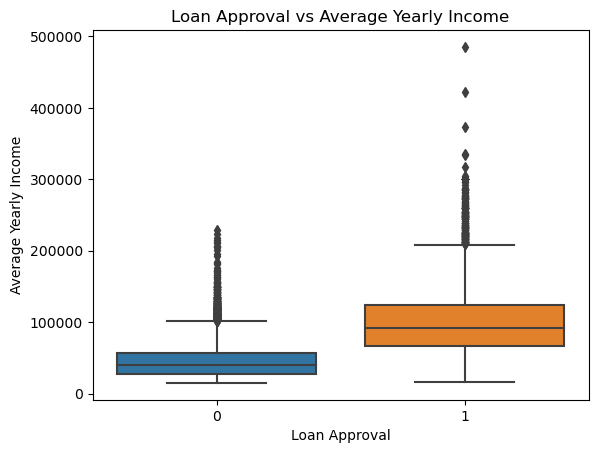

In [55]:
sns.boxplot(x='LoanApproved', y='AnnualIncome', data=data)
plt.xlabel('Loan Approval')
plt.ylabel('Average Yearly Income')
plt.title('Loan Approval vs Average Yearly Income')
plt.show()

A notable disparity in average yearly income was observed between approved and refused loan applications. Approved applicants had an average income of 102,210.55, while refused applicants had an average income of 45,641.46

P-value treshold: 5% 

H0: 'The yearly income of the applicant has no impact on loan applroval' 

H1: 'The yearly income of the applicant significantly impacts loan applroval'

In [103]:
Income_approved = data[data['LoanApproved']==1]['AnnualIncome']
Income_notapproved = data[data['LoanApproved']==0]['AnnualIncome']

In [ ]:
import scipy.stats as stats
t_stat_4, p_value_4 = stats.ttest_ind(Income_approved, Income_notapproved)

In [135]:
print('T-statistic ', t_stat_4)
print('P-value: ', p_value_4)

T-statistic  105.48245401075667
P-value:  0.0


Given the extremely low p-value, we can confidently reject the null hypothesis. This means that there is a strong statistical evidence to suggest that annual income significantly impacts loan approval decisions. The high T-statistic shows that individuals with higher annual incomes are more likely to be approved for loans.

# Loan Characteristics:

### Loan amount

In [65]:
Amount = data[['LoanAmount', 'LoanApproved']]
Amount = Amount.groupby('LoanApproved')['LoanAmount'].mean()
Amount

LoanApproved
0    26684.996386
1    19144.709414
Name: LoanAmount, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_3484\3840632822.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LoanApproved', y='LoanAmount', data= data, ci=None)


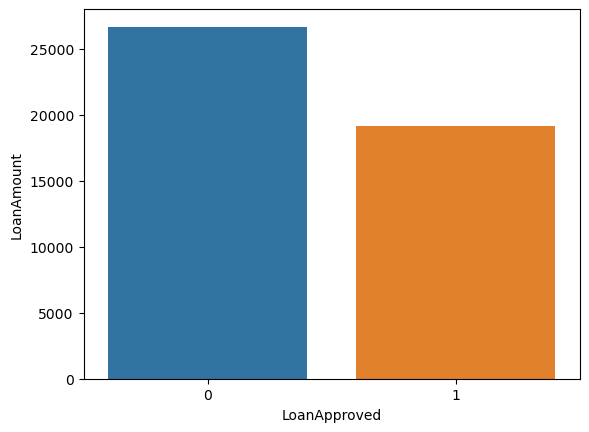

In [66]:
sns.barplot(x='LoanApproved', y='LoanAmount', data= data, ci=None)
plt.show()

Accepted loan applications tend to be of smaller amounts, compared to declined ones

P-value treshold: 5% 

H0: 'The amount of the loan has no impact on loan applroval' 

H1: 'The amount of the loan significantly impacts loan applroval'

In [157]:
Amount_approved = data[data['LoanApproved']==1]['LoanAmount']
Amount_notapproved = data[data['LoanApproved']==0]['LoanAmount']

In [160]:
t_stat_6, p_value_6 = stats.ttest_ind(Amount_approved, Amount_notapproved)

In [161]:
print('T-statistic ', t_stat_6)
print('P-value: ', p_value_6)

T-statistic  -34.88327980913309
P-value:  7.325161540913135e-259


The extremely low p-value provides strong statistical evidence to reject the null hypothesis. This suggests a significant relationship between loan amount and approval decisions. The negative T-statistic indicates that loans with smaller amounts are more likely to be approved.

### Interest rate

In [71]:
print(data.InterestRate.mean())
InterestR = data[['InterestRate', 'LoanApproved']]
InterestR = InterestR.groupby('LoanApproved')['InterestRate'].mean()
InterestR

0.23911001653328232


LoanApproved
0    0.246244
1    0.216393
Name: InterestRate, dtype: float64

Our analysis reveals an interesting trend in interest rates. While the overall average interest rate stands at 0.2391, a notable distinction emerges between accepted and declined loan applications. Accepted loans exhibit a lower average interest rate of 0.216393, whereas declined loans tend to have a higher average interest rate of 0.246244. These findings suggest that a lower interest rate may be a significant factor in loan approval decisions.

P-value treshold: 5% 

H0: 'The interest rate has no impact on loan applroval' 

H1: 'The interest rate significantly impacts loan applroval'

In [114]:
IR_approved = data[data['LoanApproved']==1]['InterestRate']
IR_notapproved = data[data['LoanApproved']==0]['InterestRate']

In [156]:
t_stat_7, p_value_7 = stats.ttest_ind(IR_approved, IR_notapproved)
print('T-statistic ', t_stat_7)
print('P-value: ', p_value_7)

T-statistic  -44.741056556834685
P-value:  0.0


The extremely low p-value provides strong statistical evidence to reject the null hypothesis. This suggests a significant negative relationship between interest rate and loan approval. The negative T-statistic indicates that loans with lower interest rates are more likely to be approved.

### Loan duration 

In [73]:
print(data.LoanDuration.mean())
duration = data[['LoanDuration', 'LoanApproved']]
duration = duration.groupby('LoanApproved')['LoanDuration'].mean()
duration

54.057


LoanApproved
0    55.363995
1    49.895397
Name: LoanDuration, dtype: float64

Our analysis indicates that the average loan duration is 54 months. However, a noticeable difference exists between accepted and declined loan applications. Accepted loans tend to have shorter durations, averaging 49.89 months, while declined loans exhibit longer durations, averaging 55.36 months. This suggests that shorter loan terms may be more favorable for loan approval.

P-value treshold: 5% 

H0: 'The loan duration has no impact on loan applroval' 

H1: 'The loan duration significantly impacts loan applroval'

In [120]:
duration_approved = data[data['LoanApproved']==1]['LoanDuration']
duration_notapproved = data[data['LoanApproved']==0]['LoanDuration']

In [142]:
t_stat_8, p_value_8 = stats.ttest_ind(duration_approved, duration_notapproved)
print('T-statistic ', t_stat_8)
print('P-value: ', p_value_8)

T-statistic  -13.432073529171243
P-value:  5.904813377376777e-41


The remarkably low p-value suggests that we can reject the null hypothesis and accept the alternative one. The duration of the loan has a significant impact on its approval. The negative T-statistic suggests that Loans of shorter durations are more likely to be accepted.

### Creditworthiness Variables:

### Credit score

In [46]:
CreditS = data[['CreditScore', 'LoanApproved']]
CreditS = CreditS.groupby('LoanApproved')['CreditScore'].mean()
CreditS

LoanApproved
0    567.554205
1    584.534100
Name: CreditScore, dtype: float64

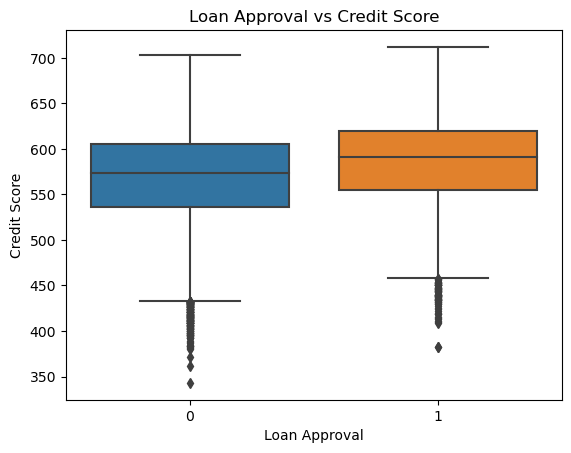

In [47]:
sns.boxplot(x='LoanApproved', y='CreditScore', data=data)
plt.xlabel('Loan Approval')
plt.ylabel('Credit Score')
plt.title('Loan Approval vs Credit Score')
plt.show()

Our analysis indicates that individuals with approved loan applications tend to have slightly higher credit scores than those with declined applications. However, this difference doesn't appear to be substantial.

P-value treshold: 5% 

H0: 'The credit score has no impact on loan applroval' 

H1: 'The credit score significantly impacts loan applroval'

In [48]:
CS_approved = data[data['LoanApproved']==1]['CreditScore']
CS_notapproved = data[data['LoanApproved']==0]['CreditScore']

In [53]:
t_stat_5, p_value_5 = stats.ttest_ind(CS_approved, CS_notapproved)

In [54]:
print('T-statistic ', t_stat_5)
print('P-value: ', p_value_5)

T-statistic  20.286451236445867
P-value:  1.3816662548786144e-90


Based on the statistical analysis, we can conclude that credit score is a significant factor influencing loan approval decisions. Individuals with higher credit scores are more likely to be approved for loans compared to those with lower credit scores.

### Monthly dept payements

In [74]:
print(data.MonthlyDebtPayments.mean())
MonthlyPayement = data[['MonthlyDebtPayments', 'LoanApproved']]
MonthlyPayement = MonthlyPayement.groupby('LoanApproved')['MonthlyDebtPayments'].mean()
MonthlyPayement

454.2927


LoanApproved
0    463.783180
1    424.074059
Name: MonthlyDebtPayments, dtype: float64

On average, applicants with lower monthly debt payments are more likely to be approved for loans compared to those with higher monthly debt payments. This indicates that lenders may consider a lower debt burden as a positive factor in assessing loan applications.

P-value treshold: 5% 

H0: 'The Monthly Debt Payments have no impact on loan applroval' 

H1: 'The Monthly Debt Payments significantly impact loan applroval'

In [117]:
Monthlypayement_approved = data[data['LoanApproved']==1]['MonthlyDebtPayments']
Monthlypayement_notapproved = data[data['LoanApproved']==0]['MonthlyDebtPayments']

In [144]:
t_stat_9, p_value_9 = stats.ttest_ind(Monthlypayement_approved, Monthlypayement_notapproved)
print('T-statistic ', t_stat_9)
print('P-value: ', p_value_9)

T-statistic  -9.98242879489941
P-value:  2.0643201794445868e-23


Our statistical test confirms the previous findings, the small p-value validates that there is a relationship between the monthly dept payements and the loan approval. We can confidently reject the null hypothesis. The negative T-statistic confirms that individuals with lower monthly dept payements are more likely to secure loans.

### Total Debt To Income Ratio

In [ ]:
DebtToIncomeRatio = data[['TotalDebtToIncomeRatio', 'LoanApproved']]
DebtToIncomeRatio = DebtToIncomeRatio.groupby('LoanApproved')['TotalDebtToIncomeRatio'].mean()
DebtToIncomeRatio

LoanApproved
0    0.480130
1    0.153987
Name: TotalDebtToIncomeRatio, dtype: float64

Our analysis reveals a significant disparity in Debt-to-Income (DTI) ratios between accepted and declined loan applications. Accepted loans exhibit a significantly lower average DTI of 0.15, while declined loans have a substantially higher average DTI of 0.48. This finding underscores the importance of a lower DTI ratio in securing loan approval.

P-value treshold: 5% 

H0: 'The dept to income ratio has no impact on loan applroval' 

H1: 'The dept to income ratio significantly impacts loan applroval'

In [164]:
DTIR_approved = data[data['LoanApproved']==1]['TotalDebtToIncomeRatio']
DTIR_notapproved = data[data['LoanApproved']==0]['TotalDebtToIncomeRatio']

In [165]:
t_stat_10, p_value_10= stats.ttest_ind(DTIR_approved, DTIR_notapproved)
print('T-statistic ', t_stat_10)
print('P-value: ', p_value_10)

T-statistic  -63.64284105514982
P-value:  0.0


The extremely low p-value provides strong statistical evidence to reject the null hypothesis. This suggests a significant negative relationship between debt-to-income ratio and loan approval. The negative T-statistic indicates that loans with lower debt-to-income ratios are more likely to be approved.

# Conclusion:

### Demographic factors influencing credit granting decisions:

Our analysis revealed significant correlations between several demographic variables and the probability of granting credit.

The results obtained indicate that age, professional status, level of education and annual income are robust determinants of the credit decision. The most favoured profiles are those of seniors, self-employed workers, people with high education levels and high incomes. Conversely, young people, the unemployed, people with low incomes and people with a lower education level have more difficulty obtaining credit.

Our results also reveal no significant link between marital status and the credit decision.

### Evaluation of Loan Characteristics and Creditworthiness impact on credit approval:

The in-depth study of credit variables revealed statistically significant correlations with the probability of granting a loan.

#### Loan characteristics: 
Our results indicate a monotonic negative relationship between the probability of granting and the loan amount, the interest rate and the loan duration. Smaller loans with preferential rates and shorter duration are associated with a lower perceived credit risk.


### Repayment capacity: 
The applicant's repayment capacity, assessed through monthly payments, the debt-to-income ratio and the Credit score, also significantly influences the granting decision. Profiles with lower monthly payments and a lower debt-to-income ratio are preferred by lenders. While Individuals with a high credit score have a lower perceived risk of default, which translates into a significantly higher probability of acceptance.

These results confirm the importance of quantitative credit risk assessment in the decision-making process of financial institutions. Credit scoring models used by banking institutions generally integrate these variables, thus making it possible to differentiate  between good and bad risks.


# Predictions models

## Credit characteristics-based model

### Initial modeling attempts:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [38]:
X = data[['LoanAmount', 'LoanDuration', 'InterestRate']]
y = data['LoanApproved']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [12]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [13]:
y_pred = model.predict(X_test)

In [14]:
print('Classification repport: ')
print(classification_report(y_test, y_pred))

Classification repport: 
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      4522
           1       0.39      0.72      0.50      1478

    accuracy                           0.65      6000
   macro avg       0.63      0.67      0.62      6000
weighted avg       0.75      0.65      0.67      6000



The model performs well for category 0 with high values of precision and recall. However, teh performance for category 1 is clearly insufficient, with a precision of 0.29 and recall of 0.35.These low values indicate an inability of the model to correctly identify instances in this category.which compromises its overall effectiveness.

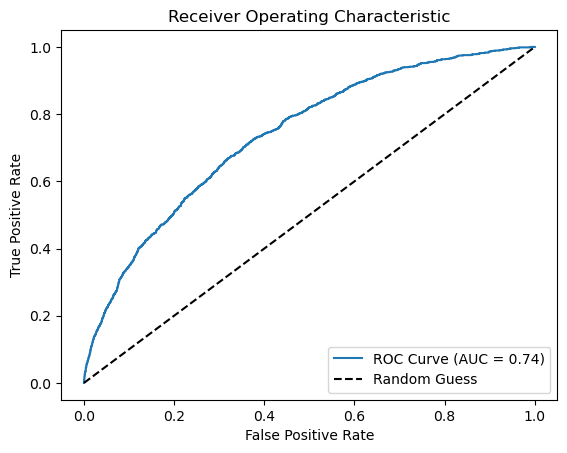

In [15]:
# predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

#  ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve indicates that our model has decent but not excellent performance. It is able to distinguish positive examples from negative examples to some extent. The AUC of 0.74 suggests that the model is slightly better than a random model, but it could be improved.

The model's performance is heavily skewed towards class 0. This imbalance is due to the class distribution in the dataset.

We will test few more methods in order to choose the optimal model. 

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      4522
           1       0.47      0.27      0.34      1478

    accuracy                           0.75      6000
   macro avg       0.63      0.59      0.59      6000
weighted avg       0.71      0.75      0.72      6000



### XGBOOST Classifier

In [17]:
from xgboost import XGBClassifier 
model = XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]), random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      4522
           1       0.39      0.63      0.48      1478

    accuracy                           0.67      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.74      0.67      0.69      6000



### Grid Search CV

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3,5,7],
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators': [50,100,200],
}
grid = GridSearchCV(XGBClassifier(random_state = 42), param_grid, scoring='f1', cv=3)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [21]:
print('Best Parameter: ', grid.best_params_)

Best Parameter:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [22]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      4522
           1       0.52      0.23      0.32      1478

    accuracy                           0.76      6000
   macro avg       0.66      0.58      0.59      6000
weighted avg       0.72      0.76      0.72      6000



### XGBOOST With SMOTE Sampling

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [25]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
from collections import Counter
print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 10698, 1: 3302})
Resampled dataset shape: Counter({0: 10698, 1: 10698})


In [27]:
from xgboost import XGBClassifier 
model = XGBClassifier( random_state = 42)
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4522
           1       0.46      0.45      0.45      1478

    accuracy                           0.73      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.73      0.73      0.73      6000



###  XGBOOST With SMOTE and Random Undersampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
smote = SMOTE(random_state = 42)
undersample = RandomUnderSampler(random_state=42)
resample_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
X_resampled, y_resampled = resample_pipeline.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
 
model = XGBClassifier( random_state = 42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4522
           1       0.60      0.57      0.58      1478

    accuracy                           0.80      6000
   macro avg       0.73      0.72      0.73      6000
weighted avg       0.80      0.80      0.80      6000



# Final Model:

In [57]:
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Grid SearchCV', 'XGBOOST', 'XGBOOST with SMOTE', 'XGBOOST with  SMOTE & Random Undersampling'],
    'Precision (class 0)' : [0.77, 0.79, 0.85, 0.79, 0.82, 0.86],
    'Recall (class 0)' : [0.73, 0.90, 0.68, 0.93, 0.83, 0.88],
    'F1 (class0)': [0.73, 0.84, 0.76, 0.85, 0.82, 0.87],
    'Precision (class 1)' : [0.29, 0.47, 0.39, 0.53, 0.46, 0.60],
    'Recall (class 1)' : [0.35, 0.27, 0.63, 0.23, 0.45, 0.57],
    'F1 (class 1)' : [0.50, 0.34, 0.48, 0.32, 0.45, 0.58],
}
Results = pd.DataFrame(model_results)
Results

,Model,Precision (class 0),Recall (class 0),F1 (class0),Precision (class 1),Recall (class 1),F1 (class 1)
0,Logistic Regression,0.77,0.73,0.73,0.29,0.35,0.50
1,Random Forest,0.79,0.90,0.84,0.47,0.27,0.34
2,Grid SearchCV,0.85,0.68,0.76,0.39,0.63,0.48
3,XGBOOST,0.79,0.93,0.85,0.53,0.23,0.32
4,XGBOOST with SMOTE,0.82,0.83,0.82,0.46,0.45,0.45
5,XGBOOST with SMOTE & Random Undersampling,0.86,0.88,0.87,0.60,0.57,0.58


Afetr testing with multiple modeling technics, the XGBoost model with SMOTE and Random Undersampling appears to be the optimal model. Based on metrics like the precision, the recall and the F1 score, it seems to have the most balanced performance across both classes. Taking into acount the extrem imblance in the dataset between class 0 and 1, we can say thea it reasonable performance.

In [31]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[3957  565]
 [ 637  841]]


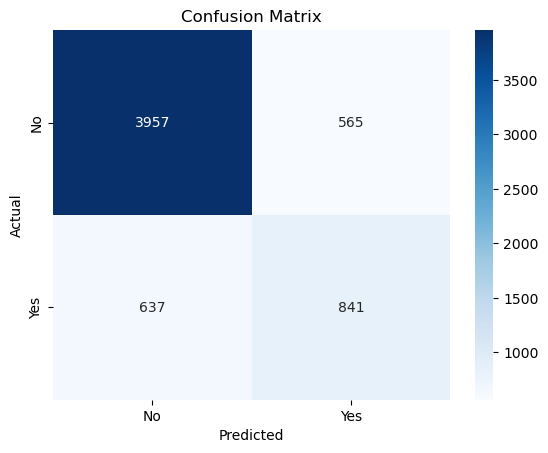

In [32]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

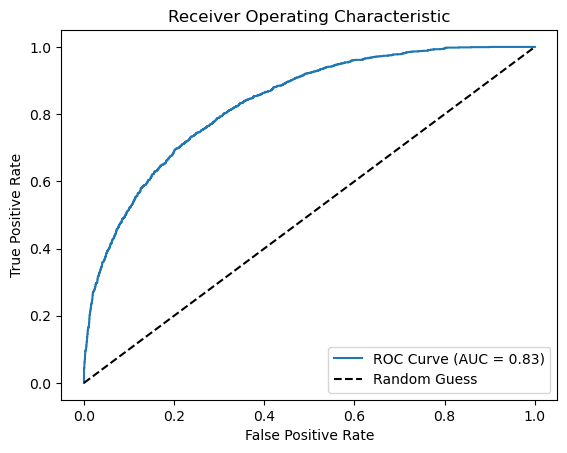

In [34]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpreting the ROC Curve

Curve shape: The ideal ROC curve is a line that rises vertically along the y-axis and then horizontally along the x-axis. The closer the curve is to this ideal shape, the better the model's performance. In this case, the curve is relatively close to the ideal shape, indicating good performance.

Area Under the Curve (AUC): The AUC (Area Under the Curve) is a quantitative measure of the overall performance of the model. It varies between 0 and 1. An AUC of 0.5 corresponds to a random model, while an AUC of 1 corresponds to a perfect model. In this case, with an AUC of 0.83, our model has good classification performance.


Overall, the ROC curve indicates that our model performs well. It is able to distinguish positive examples from negative examples with good accuracy. The AUC of 0.83 suggests that the model is significantly better than a random model.

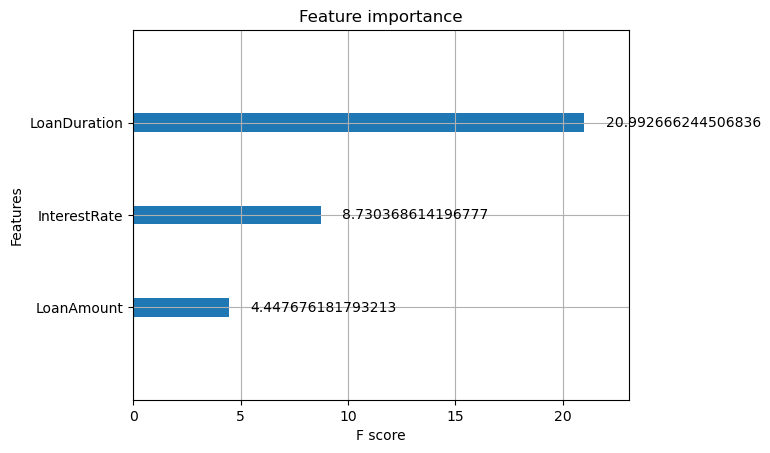

In [43]:
import xgboost as xgb
xgb.plot_importance(model, importance_type='gain')
plt.show()

## Feature Importance Visualization Analysis:

In models like XGBoost, the F-score (feature importance) represents how often a feature is used to split the data across all decision trees in the ensemble. A higher F-score indicates that the feature is frequently used for splits.

### LoanDuration: 
It is the most important feature: It is used most frequently to split the data.

### InterestRate:
It is less important than LoanDuration: Although it is used significantly, interest is less important than loan duration in the model's data splits.

### LoanAmount:
It is the least important: The loan amount appears to be the least used feature in the data splits.


### Limitations and nuances to consider:

It is essential to keep the following limitations in mind when interpreting this type of plot:

F-score and actual impact: A high F-score indicates frequent use of a feature in decision trees, but does not guarantee that this feature has the greatest impact on the final prediction. For example, a feature may be used frequently to create minor splits in the data, but may not have a significant impact on the predicted value.

Feature interactions: The F-score does not account for feature interactions. A feature may have a large impact when combined with others, but this impact may not be reflected in its individual F-score.


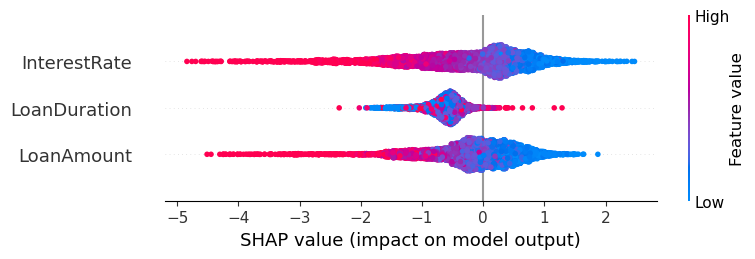

In [62]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

## SHAP Visualization Analysis:

SHAP values quantify the magnitude and direction of a feature’s contribution to a single prediction.
It tells us how much the presence of a feature influences the prediction outcome compared to the baseline (average prediction).


### Interest Rate:

Higher interest rates generally have a negative impact on the loan decision (lower SHAP values). In other words, the higher the interest rate, the less likely the loan is to be granted.

### Loan Duration: 

The impact of loan duration is less clear. Some observations with longer durations have a positive impact, while others have a negative impact. This suggests that the relationship between loan duration and the loan decision is more complex and may depend on other characteristics.

### LoanAmount: 

Similar to the interest rate, higher loan amounts (red dots) tend to have a negative impact on the loan decision.


Conclusions:

Interest rate and loan amount appear to be the most important characteristics influencing the loan decision in this model.
The duration of the loan has a less obvious impact and would require further analysis.

## Cross-Validation:

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_resampled, y_resampled, scoring='f1', cv= 5)
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Mean F1 Score: {scores.mean()}")


Cross-Validation F1 Scores: [0.77498719 0.77633379 0.77348821 0.76149623 0.78304743]
Mean F1 Score: 0.773870568107473


The cross-validation mean F1 score (0.77) falls between the two F1 scores from the classification repport (0.87 and 0.58), this suggests that the model is reasonably consistent. A mean F1 of 0.77 indicates that the model performs well on unseen data.

# Creditworthiness variables-based model

In [37]:
X2 = data[['CreditScore', 'TotalDebtToIncomeRatio', 'MonthlyLoanPayment']]
y2 = data['LoanApproved']

In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=42)

In [40]:
smote = SMOTE(random_state = 42)
undersample = RandomUnderSampler(random_state=42)
resample_pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
X2_resampled, y2_resampled = resample_pipeline.fit_resample(X2, y2)

 
model2 = XGBClassifier( random_state = 42)
model2.fit(X2_resampled, y2_resampled)

y2_pred = model2.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4522
           1       0.66      0.89      0.76      1478

    accuracy                           0.86      6000
   macro avg       0.81      0.87      0.83      6000
weighted avg       0.89      0.86      0.87      6000



In [41]:
y2_prob = model2.predict_proba(X2_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y2_test, y2_prob)
roc_auc = roc_auc_score(y2_test, y2_prob)

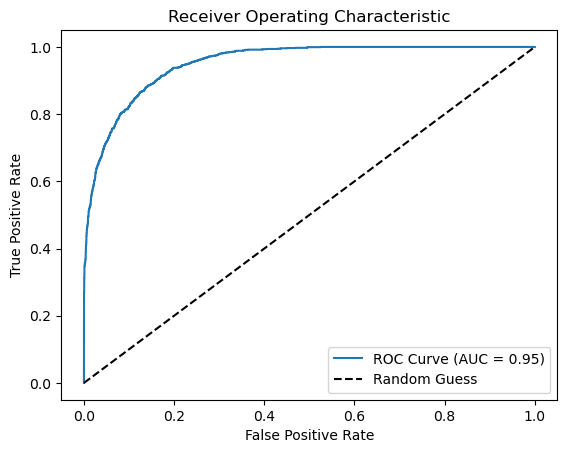

In [42]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC (Area Under the Curve) of 0.95: This value close to 1 indicates that the model has an excellent ability to distinguish positive classes from negative classes.

Curve close to the upper left corner: This means that the model achieves a high true positive rate while maintaining a low false positive rate, which is desirable.

We decide to finalize this model as it meets performance expectations. The metrics, including precision, recall, and an AUC-ROC score of 0.95, demonstrate a strong ability to predict loan approval accurately. Considering the class imbalance in the dataset, the performance is both resonable and acceptable.

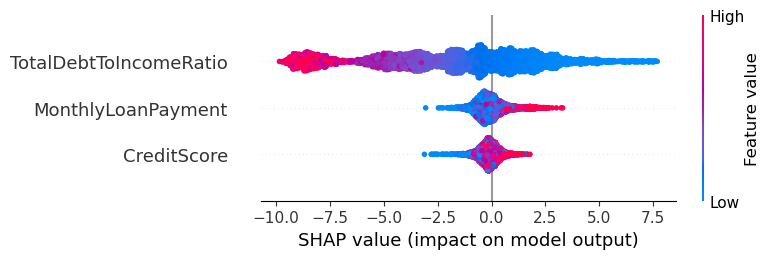

In [45]:
explainer = shap.Explainer(model2)
shap_values = explainer(X2_test)
shap.summary_plot(shap_values, X2_test)

## SHAP Visualization Analysis :

### Total Debt To Income Ratio:

Impact: A high debt ratio generally has a negative impact on the prediction (predominantly negative SHAP values). This means that the higher the ratio, the less likely it is that the loan will be granted.

Distribution: The distribution of SHAP values ​​is quite wide, suggesting that the impact of this ratio can vary considerably across observations.

### Monthly Loan Payments:

Impact: A high monthly payments amount generally has a negative impact on the prediction. This makes sense, since a high monthly payments can make it more difficult to repay the loan.

Distribution: The distribution is more concentrated around negative values, indicating a more systematic negative impact than for the debt ratio.

### Credit Score:

Impact: A high credit score generally has a positive impact on the prediction. This means that a better credit score increases the chances of getting a loan.

Distribution: The distribution is centered around positive values, confirming the importance of the credit score in the loan decision.

### Conclusions:

This SHAP plot allows us to draw the following conclusions:

The model places great importance on the debt ratio and the credit score. Both of these characteristics have a significant impact on the final prediction.
A high debt ratio and a high monthly payment amount tend to decrease the chances of getting a loan.
A high credit score increases the chances of getting a loan.

## Cross-Validation:

In [64]:
scores = cross_val_score(model2, X2_resampled, y2_resampled, scoring='f1', cv= 5)
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Mean F1 Score: {scores.mean()}")


Cross-Validation F1 Scores: [0.85327817 0.85330807 0.85228882 0.8601432  0.85934793]
Mean F1 Score: 0.8556732355991725


Mean F1 Score of 0.85 indicates a good performance.

# Business Impact

The insights and predictive models developed through this project provide practical tools for loan officers to make more informed decisions about loan approvals. Specifically:

1. Loan Characteristics Model:
• Loan officers can use this model to assess the likelihood of loan approval based on characteristics such as loan duration, interest rates, and loan amounts.
• By identifying the most impactful variables (e.g., interest rate), loan officers can tailor loan offers or set thresholds for approval criteria to reduce risk.

2. Creditworthiness Model:
• This model allows loan officers to assess borrowers’ creditworthiness based on factors such as monthly debt payments, credit score, and dept to income ratio.
• It helps streamline the decision-making process by flagging high-risk applications, allowing loan officers to focus on cases with a higher likelihood of approval.

3. Impact of imbalanced categories:
• The models account for the imbalance between approved and rejected loans, ensuring that forecasts remain reliable for underrepresented cases (approved loans).
• This reduces the risk of denying loans to potentially creditworthy individuals, thereby promoting inclusion and profitability.

4. Operational efficiency:
• By automating parts of the decision-making process, these models can reduce the time required for manual loan reviews and improve the consistency of approvals.